In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


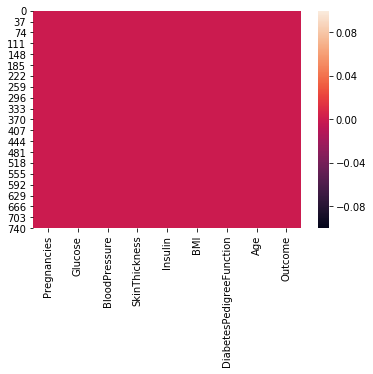

In [5]:
sns.heatmap(df.isnull())

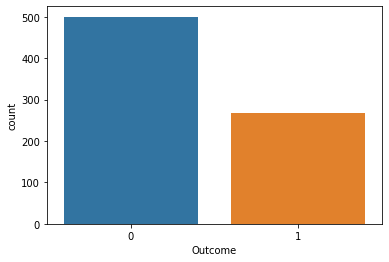

In [7]:
sns.countplot(df['Outcome'])

In [8]:
# It is clearly visible that data is imbalanced hence the result skews on one side so
# We will do oversampling/undersampling after complete preprocessing 

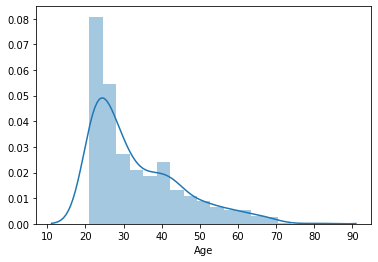

In [9]:
sns.distplot(df['Age'])

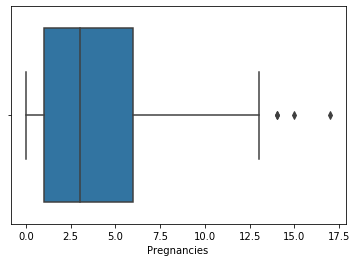

In [11]:
sns.boxplot(df['Pregnancies'])

In [15]:
df[df['Pregnancies']>13].count()

Pregnancies                 4
Glucose                     4
BloodPressure               4
SkinThickness               4
Insulin                     4
BMI                         4
DiabetesPedigreeFunction    4
Age                         4
Outcome                     4
dtype: int64

In [21]:
print(np.median(df['Pregnancies']))

3.0


In [40]:
a=df[df['Pregnancies']>13].index
print(a)

Int64Index([159, 298, 455], dtype='int64')


In [42]:
for i in  a:
    df.loc[a,'Pregnancies']=np.median(df['Pregnancies'])

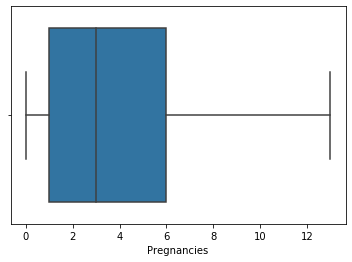

In [43]:
sns.boxplot(df['Pregnancies'])

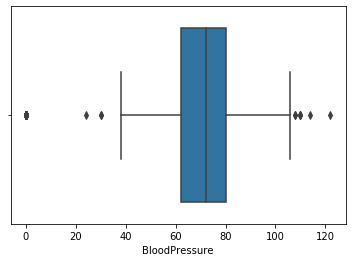

In [44]:
sns.boxplot(df['BloodPressure'])

In [52]:
a=np.min(df[df['BloodPressure']>0]['BloodPressure'])

In [56]:
c=df[df['BloodPressure']==0].index

In [57]:
for i in c:
    df.loc[i,'BloodPressure']=a

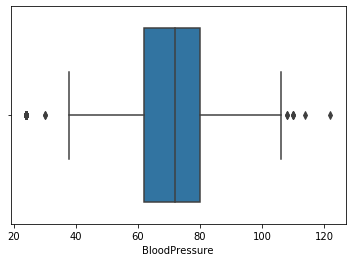

In [58]:
sns.boxplot(df['BloodPressure'])

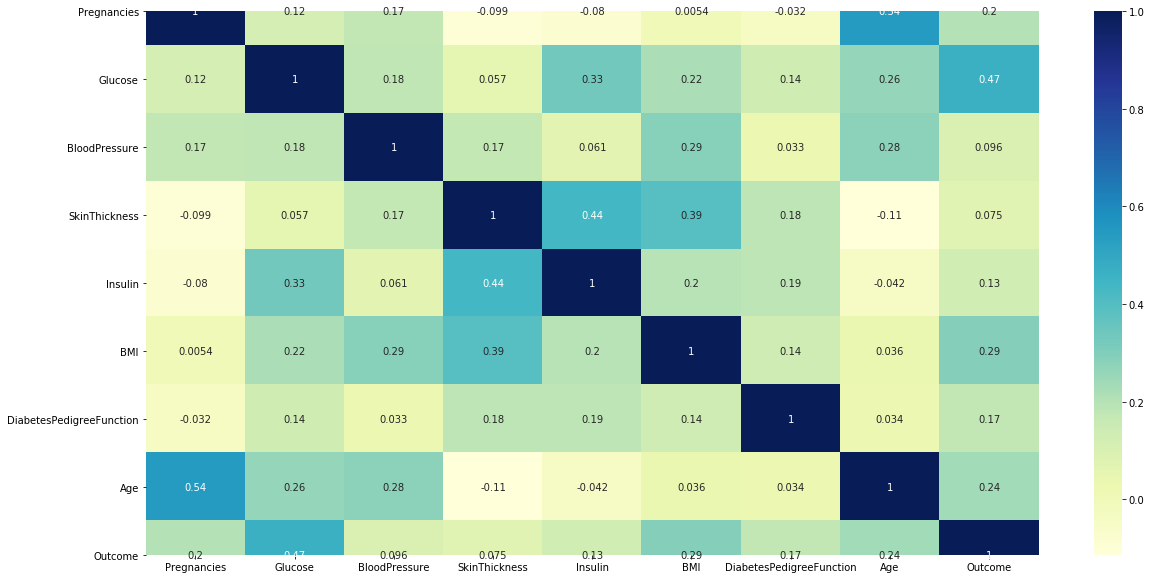

In [109]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler=StandardScaler()

In [133]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [134]:
from imblearn.over_sampling import RandomOverSampler

In [135]:
os=RandomOverSampler(ratio=1)

In [136]:
x_res,y_res=os.fit_sample(X,y)

In [137]:
x_res.shape

(1000, 8)

In [138]:
y_res.shape

(1000,)

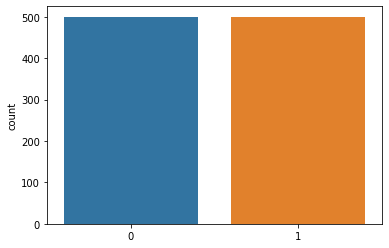

In [139]:
sns.countplot(y_res)

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_train,X_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=101)

In [142]:
X_train=scaler.fit_transform(X_train)

In [143]:
X_test=scaler.transform(X_test)

In [144]:
from sklearn.linear_model import LogisticRegression

In [213]:
lr=LogisticRegression(random_state=8)

In [214]:
lr.fit(X_train,y_train)

C:\Users\ANKIT PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=8, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [215]:
pred=lr.predict(X_test)

In [216]:
from sklearn.metrics import accuracy_score,classification_report

In [217]:
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.73
              precision    recall  f1-score   support

           0       0.68      0.77      0.72        91
           1       0.78      0.70      0.74       109

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200



In [218]:
from sklearn.svm import SVC

In [219]:
sv=SVC(kernel='linear',random_state=10)
sv.fit(X_train,y_train)
predsv=sv.predict(X_test)
print(accuracy_score(y_test,predsv))
print(classification_report(y_test,predsv))

0.715
              precision    recall  f1-score   support

           0       0.66      0.76      0.71        91
           1       0.77      0.68      0.72       109

    accuracy                           0.71       200
   macro avg       0.72      0.72      0.71       200
weighted avg       0.72      0.71      0.72       200



In [220]:
from sklearn.tree import DecisionTreeClassifier

In [221]:
sv=DecisionTreeClassifier(random_state=6)
sv.fit(X_train,y_train)
predsv=sv.predict(X_test)
print(accuracy_score(y_test,predsv))
print(classification_report(y_test,predsv))

0.835
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        91
           1       0.83      0.88      0.85       109

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



In [222]:
from sklearn.ensemble import RandomForestClassifier

In [225]:
sv=RandomForestClassifier(random_state=8)
sv.fit(X_train,y_train)
predsv=sv.predict(X_test)
print(accuracy_score(y_test,predsv))
print(classification_report(y_test,predsv))
print(sv.score(X_train,y_train))

0.875
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        91
           1       0.89      0.88      0.88       109

    accuracy                           0.88       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.88      0.88      0.88       200

0.98875


C:\Users\ANKIT PC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [226]:
from xgboost import XGBClassifier

In [233]:
sv=XGBClassifier(random_state=50)
sv.fit(X_train,y_train)
predsv=sv.predict(X_test)
print(accuracy_score(y_test,predsv))
print(classification_report(y_test,predsv))
print(sv.score(X_train,y_train))

0.78
              precision    recall  f1-score   support

           0       0.77      0.74      0.75        91
           1       0.79      0.82      0.80       109

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200

0.89625
